In [47]:
# Machine Learning
# Practical 2:

In [2]:
# Importing cPickle, Numpy and Pyplot
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning)

# Load wite whine data
X, y = cp.load(open('winequality-white.cPickle', 'rb'), encoding='latin1')

# Create the train and test sets
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]

X_test = X[N_train:]
y_test = y[N_train:]

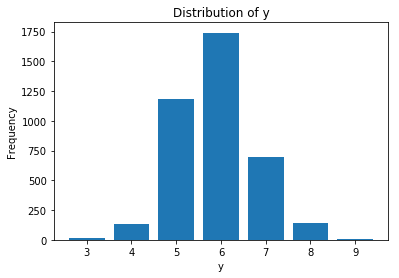

In [3]:
# Creating a bar chart of distribution of y values of the training set
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, align='center')
plt.title("Distribution of y")
plt.xlabel("y")
plt.ylabel("Frequency")

plt.show()

In [4]:
# Get the average value of y in the training set
y_train_mean = np.mean(y_train)

# Define a function returning the Mean Squared Error
def mean_squared_error(y_actual, y_predict):
    return np.mean((y_predict - y_actual)**2)

# Get the MSE of train and test data by predicting the average value of y of the training set
sq_error_train = mean_squared_error(y_train, y_train_mean)
sq_error_test = mean_squared_error(y_test, y_train_mean)

print("By predicting the average value of y from the traing set, we get the following MSEs")
print("For training set - ", sq_error_train)
print("For test set - ", sq_error_test)

By predicting the average value of y from the traing set, we get the following MSEs
For training set -  0.795421570996
For test set -  0.739404610626


In [5]:
# Linear Model Using Least Squares

# First, we need to standartize the training and test sets, so that
# the each feature have zero mean and unit variance
X_train_std = np.ones((N_train, D + 1))
X_test_std = np.ones((N_test, D + 1))

for j in range(0, D):
    avg = np.mean(X_train[:, j]) 
    std = np.std(X_train[:, j]) 
    X_train_std[:,j+1] = (X_train[:,j] - avg) / std
    X_test_std[:,j+1] = (X_test[:,j] - avg) / std

# Define a function that fits the Linear Regression model.
# It uses the closed form solution of the least squares estimate
    
def get_linear_model(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)

# Define a function that outputs the predictions of given input data wrt to a given linear model w
def linear_predict(X, w):
    return np.dot(X, w)

w = get_linear_model(X_train_std, y_train)

print("By using Linear Regression, we get the following MSEs")
print("For training set - ", mean_squared_error(y_train, linear_predict(X_train_std, w)))
print("For test set - ", mean_squared_error(y_test, linear_predict(X_test_std, w)))

By using Linear Regression, we get the following MSEs
For training set -  0.565591862974
For test set -  0.55502947826


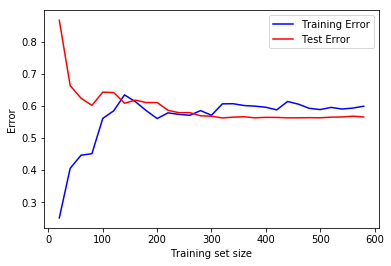

In [6]:
plt.figure()

points = range(20, 600, 20)
error_train = np.zeros(len(points))
error_test = np.zeros(len(points))

# Iterate through the training data size from 20 to 600
for i in range(0, len(points)):
    
    # Get the linear model by using only i trainig samples and compute the MSEs for training and test sets
    w = get_linear_model(X_train_std[:points[i]], y_train[:points[i]])
    error_train[i] = mean_squared_error(linear_predict(X_train_std[:points[i]], w), y_train[:points[i]])
    error_test[i] = mean_squared_error(linear_predict(X_test_std, w), y_test)

plt.xlabel('Training set size')    
plt.ylabel('Error')    

# Plot the learning curve
plt.plot(points, error_train, 'b', label='Training Error')
plt.plot(points, error_test, 'r', label='Test Error')

plt.legend()
plt.show()

In [77]:
# The figure illustrates that the learning algorithm is suffering from a high bias (underfitting).
# The test error does not improve with the increase of training set size.
# Therefore, getting more train data will not help much.

In [7]:
# Polynomial Basis Expansion with Ridge and Lasso

# Import the necessary classes

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Set the last %20 of the training set for the purpose of validaiton
N_train_new = int(0.8 * N_train)
N_cv = N_train - N_train_new

X_train_new = X[:N_train_new]
y_train_new = y[:N_train_new]

X_cv = X[N_train_new:N_train]
y_cv = y[N_train_new:N_train]

In [8]:
# Possible values for lambda and degree of the polynomial features
lambda_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
degree_values = [2, 3, 4]

ridgeBestAlpha = 0
ridgeBestDegree = 0
ridgeBestError = -1

for alpha in lambda_values:
    
    for degree in degree_values:
        
        model = Pipeline([('poly', PolynomialFeatures(degree)), ('scale', StandardScaler()), 
                          ('ridge', linear_model.Ridge(alpha = alpha, fit_intercept = True))])
        
        model.fit(X_train_new, y_train_new)
        error = mean_squared_error(model.predict(X_cv), y_cv)

        if (ridgeBestError == -1 or error < ridgeBestError):
            ridgeBestAlpha = alpha
            ridgeBestDegree = degree
            ridgeBestError = error

print("The optimal values of hyperparameters for Ridge Regression are")
print("Lambda = ", ridgeBestAlpha)
print("Degree = ", ridgeBestDegree)

The optimal values of hyperparameters for Ridge Regression are
Lambda =  10
Degree =  3


In [9]:
lassoBestAlpha = 0
lassoBestDegree = 0
lassoBestError = -1

for alpha in lambda_values:
    
    for degree in degree_values:
        
        model = Pipeline([('poly', PolynomialFeatures(degree = degree)), ('scale', StandardScaler()), 
                          ('lasso', linear_model.Lasso(alpha = alpha, fit_intercept = True))])
        
        model.fit(X_train_new, y_train_new)
        error = mean_squared_error(model.predict(X_cv), y_cv)

        if (lassoBestError == -1 or error < lassoBestError):
            lassoBestAlpha = alpha
            lassoBestDegree = degree
            lassoBestError = error

print("The optimal values of hyperparameters for Lasso are")
print("Lambda = ", lassoBestAlpha)
print("Degree = ", lassoBestDegree)

The optimal values of hyperparameters for Lasso are
Lambda =  0.001
Degree =  4


In [10]:
# After obtaining the optimal values for lambda and degree for Ridge and Lasso,
# let's train the models using the obtained hyperparameters on the whole training dataset

# Let's start with Ridge
ridgeModel = Pipeline([('poly', PolynomialFeatures(ridgeBestDegree)), ('scale', StandardScaler()), 
                          ('ridge', linear_model.Ridge(alpha = ridgeBestAlpha, fit_intercept = True))])

ridgeModel.fit(X_train, y_train)
ridgeTrain = mean_squared_error(ridgeModel.predict(X_train), y_train)
ridgeTest = mean_squared_error(ridgeModel.predict(X_test), y_test)

print("By using Ridge with degree = ", ridgeBestDegree, ", lambda = ", ridgeBestAlpha, ", we get the following MSEs")
print("For training set - ", ridgeTrain)
print("For test set - ", ridgeTest)

By using Ridge with degree =  3 , lambda =  10 , we get the following MSEs
For training set -  0.47492907728
For test set -  0.494671496439


In [11]:
# Let's do the same for Lasso
lassoModel = Pipeline([('poly', PolynomialFeatures(lassoBestDegree)), ('scale', StandardScaler()), 
                          ('lasso', linear_model.Lasso(alpha = lassoBestAlpha, fit_intercept = True))])

lassoModel.fit(X_train, y_train)
lassoTrain = mean_squared_error(lassoModel.predict(X_train), y_train)
lassoTest = mean_squared_error(lassoModel.predict(X_test), y_test)

print("By using Ridge with degree = ", lassoBestDegree, ", lambda = ", lassoBestAlpha, ", we get the following MSEs")
print("For training set - ", lassoTrain)
print("For test set - ", lassoTest)

By using Ridge with degree =  4 , lambda =  0.001 , we get the following MSEs
For training set -  0.477130141511
For test set -  0.493185640608
